In [1]:
import pandas as pd
# The data is from an open dataset: https://business.yelp.com/data/resources/open-dataset/
# read the data about business
df_business = pd.read_json("yelp_data/yelp_business_subset.json", lines=True)

# Read the data about reviews
df_review = pd.read_json("yelp_data/yelp_reviews_subset.json", lines=True)

#quicky look through the struction of the dataframe
df_business.head()
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27
1,IJCYT9dRjuBvY-BJufFnNg,hWDybu_KvYLSdEFzGrniTw,roc-xyyzN5b_nImb0NdRLQ,4,6,5,5,"As airport grab-and-go restaurants are, Earl d...",2015-01-03 23:16:09
2,YpDx1X1OvnwUgdkHeZNvWw,OfhZlqYMrCVAhM-bt_cQug,J-ciDDEdIHMcChGIyKZnOg,4,0,0,0,Beautiful clean shop with knock your socks off...,2017-02-09 15:35:11
3,MxQpzn4DLrQ6XuhEHkVvIw,QuZKJnltihmZ8jhwfxPeJA,QWqKTWQ2OiDgo3dzNkpung,5,1,0,0,The best soon-dubu in the city! This place is...,2014-05-07 20:13:19
4,BUZbFa_TeoThHW1hwCRfmQ,6w1WssQzBfdckDr2rUOXLg,sr9RI_LHMXGZfpDApPsDEw,5,0,0,0,I've been going here now for a couple of month...,2014-09-09 19:02:00


In [2]:
# To see the shape of these two dataframe
print(df_business.shape)
print(df_review.shape)

(1000, 17)
(33010, 9)


In [3]:
# select the needed columns from the business table
business_locations = df_business[['business_id', 'address', 'latitude', 'longitude', 'name']]

# combine the review table with the location information
# use 'business_id' as the key to match rows from both tables
final_data = df_review.merge(
    business_locations,
    on='business_id',
    how='inner'
)

# look at the structure of the final dataframe
final_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,address,latitude,longitude,name
0,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,928 Pine St,39.944609,-75.157833,Good Karma Cafe
1,IJCYT9dRjuBvY-BJufFnNg,hWDybu_KvYLSdEFzGrniTw,roc-xyyzN5b_nImb0NdRLQ,4,6,5,5,"As airport grab-and-go restaurants are, Earl d...",2015-01-03 23:16:09,"8500 Essington Ave, Terminal D, Philadelphia I...",39.876814,-75.239878,Earl of Sandwich
2,YpDx1X1OvnwUgdkHeZNvWw,OfhZlqYMrCVAhM-bt_cQug,J-ciDDEdIHMcChGIyKZnOg,4,0,0,0,Beautiful clean shop with knock your socks off...,2017-02-09 15:35:11,1306 Frankford Ave,39.970468,-75.134540,Cake Life Bake Shop
3,MxQpzn4DLrQ6XuhEHkVvIw,QuZKJnltihmZ8jhwfxPeJA,QWqKTWQ2OiDgo3dzNkpung,5,1,0,0,The best soon-dubu in the city! This place is...,2014-05-07 20:13:19,6600 N 5th St,40.052064,-75.127394,Jong Ka Jib
4,BUZbFa_TeoThHW1hwCRfmQ,6w1WssQzBfdckDr2rUOXLg,sr9RI_LHMXGZfpDApPsDEw,5,0,0,0,I've been going here now for a couple of month...,2014-09-09 19:02:00,337 W Girard Ave,39.970153,-75.142820,Luxe Nails


In [4]:
# my first goal is extracting the frequently used words in the reviews to reveal customers' care
# to achieve this goal, I use spacy to extract the high-frequency words
import spacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter

In [16]:
# create an empty list to store the cleaned words
comments_list = []

# loop through every review text in the table
for text in df_review['text']:
    doc = nlp(text)
    for token in doc:
        # extract the words are not common stop words and composed by letters
        if not token.is_stop and token.is_alpha:
             # save the words in lowercase
            comments_list.append((token.text.lower(), token.pos_))


In [17]:
# create empty lists for adjectives and nouns
adj_list, noun_list = [], []

# use for circulation to extract the adjectives and nouns
for w, pos in comments_list:
    if pos == 'ADJ':
        adj_list.append(w)
    elif pos == 'NOUN':
        noun_list.append(w)


In [18]:
# count how many times each adjective and noun appears
adj_freq = Counter(adj_list)
noun_freq = Counter(noun_list)

In [19]:
# print the top 10 most common adjectives and nouns to show what customers care
print("Top 10 Things People Talk About (Nouns):")
print(noun_freq.most_common(10))

print("\nTop 10 How People Feel (Adjectives):")
print(adj_freq.most_common(10))

Top 10 Things People Talk About (Nouns):
[('food', 15963), ('place', 15730), ('time', 10690), ('service', 9365), ('restaurant', 5507), ('staff', 4769), ('bar', 4746), ('menu', 4651), ('people', 4572), ('experience', 4355)]

Top 10 How People Feel (Adjectives):
[('good', 16290), ('great', 14725), ('nice', 6608), ('delicious', 5308), ('best', 5088), ('little', 4681), ('friendly', 4639), ('amazing', 4428), ('fresh', 3249), ('small', 3174)]


In [5]:
# Then I plan to recoginize the connections between crime and ratings
# I chose several high-crime streets and low-crime streets from the Internet and then stratified random sampling.
high_crime_streets = [
    "Chestnut St",
    "Walnut St",
    "Locust St",
    "Sansom St",
]

# Extract the shops in high-crime streets by their addresses
# Define the method to filter the shops
def is_in_high_crime_area(address):
    if pd.isna(address):
        return False
    
    for street in high_crime_streets:
        if street.lower() in str(address).lower(): # match the lowercase of addresses
            return True
    return False

high_crime_mask = final_data["address"].apply(is_in_high_crime_area)

# copy the matched shops
high_crime_shop = final_data[high_crime_mask].copy()

# look at the results of filtering
high_crime_shop.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,address,latitude,longitude,name
14,owBwX06qMidKaCkgZPgBIw,o4O2vs6z8iiH8kD-FrDQkw,tBT4yR-8dRwH89nzjpOzOw,5,0,0,0,Well rounded company with an amazing owner - D...,2016-02-23 20:49:24,"1601 Walnut St, Ste 1514",39.950023,-75.167581,Voree IT Solutions
152,_AOyAxwe2ClOeo68XQ1npw,XTWdXSOoUJnIMiVSA-1gDg,tBT4yR-8dRwH89nzjpOzOw,5,1,0,1,I was having a problem with my Dell laptop and...,2012-11-13 22:13:05,"1601 Walnut St, Ste 1514",39.950023,-75.167581,Voree IT Solutions
180,RdqwUzQDRxm0tKP_aM6RKw,_jW6RJvVH99JZbJrTSwz1A,CTCYk-k84VA5vCkRgv03Dg,3,1,0,0,"Love the studio, love the class, the entrance ...",2017-10-26 22:36:09,"1625 Walnut St, Fl 2",39.950139,-75.168616,SLT - Philadelphia
218,l32X5xKG3FEzHlpuFPN3PA,OZi_vafypBy2VzKnBXycfA,rApVTXXz2sUrNfDAMAIeNQ,1,6,0,0,philly yoga sutra is now closed. they shut the...,2009-03-10 21:51:57,"1401 Walnut St, 2nd Floor",39.949601,-75.164593,Yoga Sutra
219,wZ5B4IkqGlG9GXLuv6prXA,rrl_GnsIrgf8jYbQJ2raTA,CTCYk-k84VA5vCkRgv03Dg,5,0,0,0,Emma the manager is amazing and all the ladies...,2018-05-29 14:32:43,"1625 Walnut St, Fl 2",39.950139,-75.168616,SLT - Philadelphia


In [6]:
avg_high_rating = high_crime_shop["stars"].mean() # Culculate the average rating of these shops in high-crime streets
high_shop_count = high_crime_shop.shape[0] # Count the number of them

avg_high_rating, high_shop_count

(np.float64(3.7504249291784704), 3530)

In [7]:
# I randomly sampling 500 shops in high-crime street to gather their review
sample_high_crime = high_crime_shop.sample(n=500, random_state=42)
sample_high_crime.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,address,latitude,longitude,name
3835,8t-2KAIzD6ZXt5XKZiL04Q,e4brzGSmkYbEQ4yuIpZ6nw,mf0OyZ6DX2iKUFIV9TqFRQ,5,0,0,0,Finding wings that are on par with upstate NY ...,2017-06-10 22:45:56,1116 Walnut St,39.948566,-75.159851,Moriarty's Restaurant and Irish Pub
32041,l_UtLXWr2ib6IIubN9K5vg,Q9E61YSouaokmjP8Ls5bOA,O-Gtgxb2mvqyEdDfmkfFVw,4,1,0,0,"Throughout the last year, I have been traveli...",2013-11-11 18:21:49,718 Chestnut St,39.949445,-75.153222,Tommi Salon and Spa
30199,2KKXLtCX7QAG6Z137qDF1w,OdMteO9i6dS4Up234vPryg,O-Gtgxb2mvqyEdDfmkfFVw,1,0,0,0,I loved this place and now I have a gift certi...,2014-04-01 14:24:07,718 Chestnut St,39.949445,-75.153222,Tommi Salon and Spa
5921,GE_P1rQHDcWYtShWFJfvZQ,BjUh6HH0FttNCpV1SbAwxw,8iWk2GMX0e4YrmH_K-zogA,1,0,0,0,Consignment store is a generous descriptor. Mo...,2019-09-30 00:24:09,2019 Sansom St,39.951634,-75.174352,Sophisticated Seconds
3670,5t7QyCI4wziheRVDh0QKOA,FQ-zmWPEG_pjSQx6pt3Efw,mf0OyZ6DX2iKUFIV9TqFRQ,4,0,0,0,"Great place for a drink, wings or a burger. Se...",2012-11-16 15:50:25,1116 Walnut St,39.948566,-75.159851,Moriarty's Restaurant and Irish Pub


In [8]:
# gather the reviews in sample shops to make the cloud map
high_crime_text = " ".join(
    sample_high_crime["text"]
    .astype(str)
    .tolist()
)

In [9]:
doc = nlp(high_crime_text)

# Extract lemmatized nouns from the text
# Conditions:
# 1. Only keep nouns (POS == "NOUN")
# 2. Remove stopwords (e.g., "the", "and")
# 3. Keep alphabetic tokens only (exclude numbers and symbols)
# 4. Exclude very short tokens (length <= 2)
high_crime_nouns = [
    token.lemma_.lower()
    for token in doc
    if token.pos_ == "NOUN"
    and not token.is_stop
    and token.is_alpha  
    and len(token) > 2
]
# Count the frequency of each noun
high_crime_noun_freq = Counter(high_crime_nouns)
# Select the top 50 most frequent nouns
top_50_nouns_high = dict(high_crime_noun_freq.most_common(50))

top_50_nouns_high

{'place': 303,
 'time': 224,
 'food': 210,
 'wing': 176,
 'service': 171,
 'bar': 105,
 'beer': 93,
 'restaurant': 91,
 'price': 89,
 'day': 83,
 'people': 81,
 'friend': 79,
 'drink': 78,
 'experience': 77,
 'hour': 68,
 'thing': 67,
 'minute': 65,
 'staff': 65,
 'sushi': 65,
 'night': 65,
 'room': 62,
 'way': 59,
 'roll': 56,
 'eyebrow': 56,
 'menu': 55,
 'sauce': 53,
 'lot': 53,
 'order': 51,
 'pretzel': 51,
 'chicken': 50,
 'bit': 49,
 'server': 48,
 'meal': 48,
 'review': 48,
 'appointment': 46,
 'table': 46,
 'selection': 46,
 'fish': 45,
 'lunch': 45,
 'hair': 43,
 'fry': 42,
 'dinner': 42,
 'atmosphere': 41,
 'job': 40,
 'brow': 40,
 'pub': 40,
 'customer': 39,
 'soup': 39,
 'city': 38,
 'spot': 38}

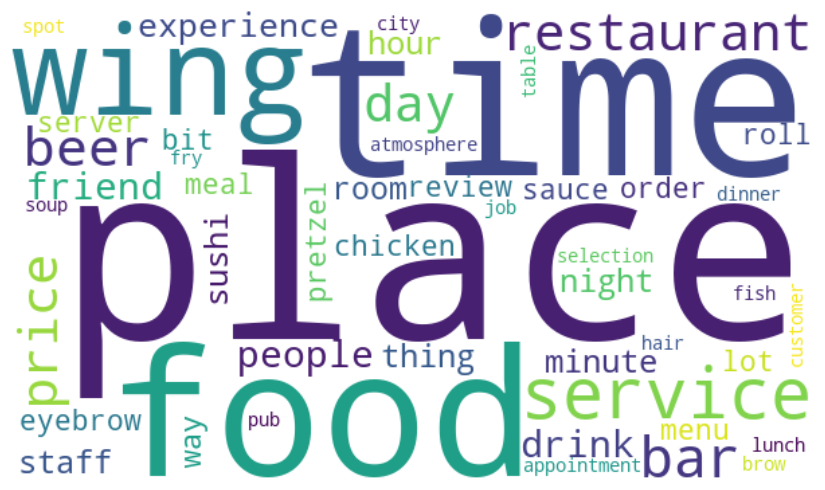

In [32]:
# Visualize the top 30 nonus by wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    width=600, height=350, # Set up the size of chart
    background_color="white", # Set the color of background
    max_words=50, #  Set up the number words in the chart
    collocations=False,
    random_state=42
).generate_from_frequencies(top_50_nouns_high)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


In [7]:
# Then I plan to recoginize the connections between crime and ratings
# I chose several high-crime streets and low-crime streets from the Internet and then stratified random sampling.
low_crime_streets = [
    "South St",
    "Carpenter St",
    "Spring Garden St",
    "South Front St"
    "Fairmount Avenue,"
]

# Extract the shops in low-crime streets by their addresses
# Define method to filter the shops
def is_in_low_crime_area(address):
    if pd.isna(address):
        return False
    
    for street in low_crime_streets:
        if street.lower() in str(address).lower():
            return True
    return False

low_crime_mask = final_data["address"].apply(is_in_low_crime_area)

# copy the matched shops
low_crime_shop = final_data[low_crime_mask].copy()

# look at the results of filtering
low_crime_shop.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,address,latitude,longitude,name
6022,jsBxL8iVCKR47QihWmy5FQ,wwPFthemuSA9jBAUAiVt-g,OvNnctPYqV9NH2vXyXsemg,5,1,0,0,Best new practice in town. Old fashioned medic...,2017-08-20 10:31:06,834 South St,39.942459,-75.156627,Bralow Medical Group
6444,jaV0UWoGv4K87PftCbD8aQ,lzBLE_oXFgu_ICayDQVogA,OvNnctPYqV9NH2vXyXsemg,5,3,0,0,I used to see Dr. Vicki Bralow at her old prac...,2017-12-21 19:46:35,834 South St,39.942459,-75.156627,Bralow Medical Group
6539,Hp6zGujxYpTrBil0fsYkgw,EvitNNPGEY-YbuR8uNec1A,OvNnctPYqV9NH2vXyXsemg,5,2,1,1,I heard about this practice on Facebook and ma...,2018-05-10 23:07:13,834 South St,39.942459,-75.156627,Bralow Medical Group
6742,NM5VprrYq8w377S9nRlR_g,J-FgPt6BiCiH9lAICAXhlQ,OvNnctPYqV9NH2vXyXsemg,5,0,0,0,I've had a bad experience in almost every Prim...,2020-01-28 20:56:52,834 South St,39.942459,-75.156627,Bralow Medical Group
6917,FiHjitFNhNCHTuCwHHXLvQ,FNk40Uaun_WXirQMKNbSXg,OvNnctPYqV9NH2vXyXsemg,1,0,0,0,Barlow is a quack. She has absolutely no bedsi...,2021-10-23 16:34:36,834 South St,39.942459,-75.156627,Bralow Medical Group


In [8]:
avg_low_rating = low_crime_shop["stars"].mean() # Culculate the average rating of these shops in high-crime streets
shop_low_count = low_crime_shop.shape[0] # Count the number of them

avg_low_rating, shop_low_count


(np.float64(3.918745545260157), 1403)

In [28]:
# I randomly sampling 500 shops in high-crime street to gather their review
sample_low_crime = low_crime_shop.sample(n=500, random_state=42)
sample_low_crime.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,address,latitude,longitude,name
25958,G1sgU8BfsJSjrGA42N9DXA,mZrbrAAtQ0Xmt_MMUEs6Kg,l2AIWFZ3ILuS4ovhdp_eeA,2,2,1,0,I came back here with a Living Social deal... ...,2012-08-12 23:22:57,308 South St,39.941332,-75.148040,Steaks On South
25152,_4Pa5qriUpH8oCfqUf-QTg,2eCTQoBJETQSU-Oi9gjyuw,-T_lkOvaK39R-Ufg6VUyxg,4,5,1,3,Very cool little place to grab some pie. And w...,2016-10-24 22:59:49,1622 South St,39.943992,-75.169586,Magpie
20392,CxHEUYmw2fOxJ2-SpNZfjQ,84HvpQDxcHWmbMDfs8IEYw,F6KGWi35Y79rC-x3LiISiA,5,4,1,3,Sandwiches here are Delicious. Really friggi...,2009-10-05 15:26:44,1603 South St,39.944157,-75.168996,DELIcious Bites
30611,Hm765DJiFOHNuB6Dhu-T7Q,VDEy9jR7kGG1S1ancq5COQ,qr7meXBoHjezOYUWMj9O4w,5,0,0,1,Good service! Good tacos with generous serving...,2018-09-05 17:02:47,248 South St,39.941262,-75.147325,Nora's Kitchen
24401,f5MQs6y2vEUB5cH63JNHSw,MfAo-QPgFrcziuygx27K5w,-T_lkOvaK39R-Ufg6VUyxg,5,0,0,0,I lasted two years in Philly without going her...,2018-07-19 03:18:02,1622 South St,39.943992,-75.169586,Magpie


In [29]:
# gather the reviews in sample shops to make the cloud map
low_crime_text = " ".join(
    sample_low_crime["text"]
    .astype(str)
    .tolist()
)

In [30]:
doc = nlp(low_crime_text)

# Same as the high-crime situation, extract lemmatized nouns from the text
# Conditions:
# 1. Only keep nouns (POS == "NOUN")
# 2. Remove stopwords (e.g., "the", "and")
# 3. Keep alphabetic tokens only (exclude numbers and symbols)
# 4. Exclude very short tokens (length <= 2)
low_crime_nouns = [
    token.lemma_.lower()
    for token in doc
    if token.pos_ == "NOUN"
    and not token.is_stop
    and token.is_alpha
    and len(token) > 2
]
# Count the frequency of each noun
low_crime_noun_freq = Counter(low_crime_nouns)
# Select the top 50 most frequent nouns
top_50_nouns_low = dict(low_crime_noun_freq.most_common(50))

top_50_nouns_low

{'pie': 480,
 'place': 298,
 'food': 247,
 'pizza': 187,
 'time': 177,
 'cheese': 137,
 'slice': 114,
 'roll': 113,
 'service': 105,
 'delivery': 99,
 'steak': 83,
 'chicken': 82,
 'beer': 81,
 'menu': 78,
 'friend': 73,
 'order': 72,
 'sauce': 68,
 'restaurant': 67,
 'sushi': 67,
 'crust': 64,
 'table': 60,
 'staff': 60,
 'flavor': 59,
 'price': 58,
 'taco': 58,
 'fry': 58,
 'minute': 57,
 'burger': 55,
 'thing': 54,
 'day': 54,
 'spot': 51,
 'salad': 51,
 'sandwich': 49,
 'night': 48,
 'star': 47,
 'dinner': 47,
 'area': 46,
 'way': 46,
 'lunch': 45,
 'cream': 45,
 'option': 44,
 'drink': 43,
 'meal': 43,
 'potato': 42,
 'experience': 41,
 'apple': 40,
 'pork': 40,
 'bit': 40,
 'cheesesteak': 40,
 'chocolate': 39}

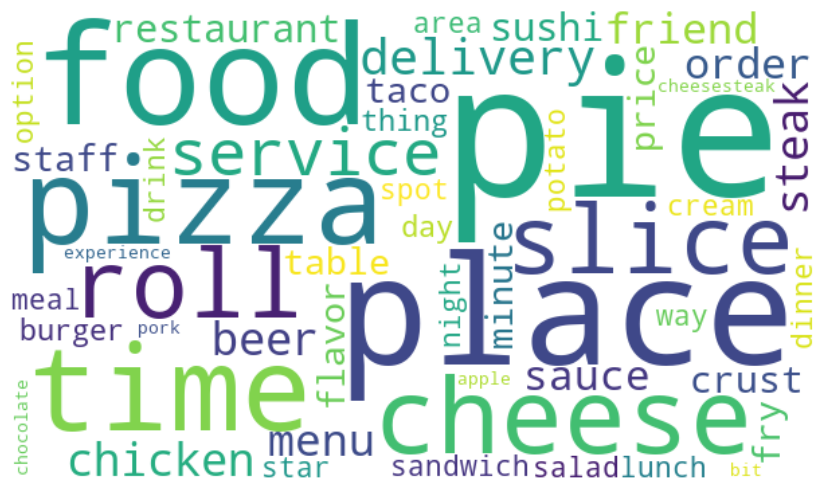

In [42]:
# Visualize the top 50 nonus in low-crime area by wordcloud

wc2 = WordCloud(
    width=600, height=350, # Set up the size of chart
    background_color="white",  #blackground color
    max_words=50, # Set up the number of words within
    collocations=False,
    random_state=42
).generate_from_frequencies(top_50_nouns_low)

plt.figure(figsize=(10, 5))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()


In [5]:
# to change the size of each dot according to the number of reviews
# use groupby to classify reviews bybusiness_id
# the 'latitude', 'longitude', 'name' is used to keep the information in the dataframe to use in the next step
map_data =  final_data.groupby(['business_id', 'latitude', 'longitude','name']).agg(
    review_count=('business_id', 'size'),  #to count the number of reviews of each score
    stars=('stars', 'mean')  # to culculate the average score
).reset_index()  #Reset the index to convert the grouped object back into a flat DataFrame.

map_data.head()   #check the sturcture of the new dataframe

,business_id,latitude,longitude,name,review_count,stars
0,-3ArWZfDjfab8qVHf3WVtg,39.925128,-75.234631,Taste Africa,5,4.000000
1,-5ink0kIoVfuS5Zi_6QBnQ,39.963106,-75.141127,Liberties Parcel,73,4.958904
2,-TW-0EqgnzUNHzV9VPSLoQ,40.079657,-75.027236,Nori Ramen & Poke Bowl,16,4.250000
3,-T_lkOvaK39R-Ufg6VUyxg,39.943992,-75.169586,Magpie,318,4.361635
4,-fjIX9bvBKwXjQWfdgiWpQ,40.007404,-75.212711,Real Food Eatery,47,4.212766


In [6]:
# my second goal is to draw a map combining rating of business and crime, and analyze their distribution and find the regularity 
# Calculate the average latitude and longitude to center our map
center_lat = map_data["latitude"].mean()
center_lon = map_data["longitude"].mean()

In [7]:
# The map methodology is from ttps://python-graph-gallery.com/593-customize-bubble-map-with-folium/
# Initialize map
import folium
from folium import plugins
import numpy as np

m = folium.Map(
    location=[center_lat, center_lon],  # center around Philadelphia
    zoom_start=12,  # zoom the map to easily find the place
    tiles='cartodb positron' # background style
)

In [8]:
# reference method: https://python-graph-gallery.com/593-customize-bubble-map-with-folium/
for idx, row in map_data.iterrows():
    
    # define the color of each dot, base on the rating of each store
    if row.stars >= 4.5:
        color = "#2ecc71"    # green
    elif row.stars >= 4.0:
        color = "#f1c40f"    # yellow
    elif row.stars >= 3.0:
        color = "#e67e22"    # orange
    else:
        color = "#e74c3c"    # red
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=np.log(row['review_count'] + 1) * 3, # define the size according to the number of reviews, and I changed the number to 3 to make it more evident
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6, 
        weight=1,
        popup=f"{row['name']} ({row.stars} stars)",  # Click the dot to see the name and stars of the store
    ).add_to(m)

m